In [1]:
from scipy.io import loadmat
import math
import numpy as np
import pandas
import matplotlib.pyplot as mp
from sklearn.decomposition import TruncatedSVD

Загрузите данные ex9_movies.mat из файла.


In [2]:
data = loadmat('ex9_movies.mat')
Y = data['Y']
R = data['R']
print(Y.shape, R.shape)

nm, nu = Y.shape

((1682, 943), (1682, 943))


Выберите число признаков фильмов (n) для реализации алгоритма коллаборативной фильтрации.


In [3]:
n=2

Реализуйте функцию стоимости для алгоритма.


In [4]:
def cost(x, thetha, y, lmbda=10.):
    cost = (np.sum((x.dot(thetha.T)-y)**2)) / 2
    cost += lmbda*(np.sum(x**2)) / 2
    cost += lmbda*(np.sum(thetha**2)) / 2
    return cost


def defaultValue(nm, nu):
    ones = np.ones((nm, 1))
    np.random.seed(41)
    x = np.random.rand(nm, n) / 100000000
    x = np.hstack((ones, x))

    zeros = np.zeros((nu, 1))
    theta = np.random.rand(nu, n) / 100000000
    theta = np.hstack((zeros, theta))
    return x, theta

x, theta = defaultValue(nm, nu)
c = cost(x, theta, Y)
print(c)

694762.0


Реализуйте функцию вычисления градиентов.


При реализации используйте векторизацию для ускорения процесса обучения.


Добавьте L2-регуляризацию в модель.


Обучите модель с помощью градиентного спуска или других методов оптимизации.


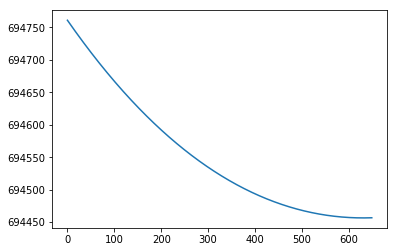

694456.390146


In [ ]:
def derivateX(x, i, j, k, theta, y, lmbda):
    return np.dot((x[i].dot(theta[j].T)-y[i,j]), theta[j,k]) + lmbda*x[i,k]

def derivateTheta(x, i, j, k, theta, y, lmbda):
    return np.dot((x[i].dot(theta[j].T)-y[i,j]), x[i,k]) + lmbda*theta[j,k]

def gradient(x, y, R, theta, alpha=.000001, lmbda=-0.1, iterations=650, n=2):
    values = dict()
    for iteration in range(iterations):
        for film in range(x.shape[0]):
            for user in range(x.shape[1]):
                for k in range(n+1):
                    di = []
                    dj = []
                    if R[film, user]:
                        deriv = derivateX(x, film, user, k, theta, y, lmbda)
                        di.append(deriv)
                        deriv2 = derivateTheta(x, film, user, k, theta, y, lmbda)
                        dj.append(deriv2)
                    x[film, k] -= alpha * sum(di)
                    theta[user, k] -= alpha * sum(dj)
        values[iteration] = cost(x, theta, Y)

    return x, theta, values

x, theta, values = gradient(x, Y, R, theta)
# c = cost(x, theta, Y)

mp.plot(values.keys(), values.values())
mp.show()

print(min(values.values()))

Добавьте несколько оценок фильмов от себя. Файл movie_ids.txt содержит индексы каждого из фильмов.


In [ ]:
rates = [
    [0, 3],
    [66, 4],
    [68, 5],
    [71, 4],
    [93, 5],
    [140, 5],
    [150, 4],
    [189, 4],
    [210, 4],
    [249, 5],
    [312, 5],
    [538, 3],
    [738, 5],
    [893, 3],
    [1442, 5]
]

myY, myR = np.zeros((nm, 1)), np.zeros((nm, 1))
for rate in rates:
    myY[rate[0]] = rate[1]
    myR[rate[0]] = 1
print(myY.shape, myR.shape)

Y = np.hstack((Y, myY))
R = np.hstack((R, myR))


x, theta = defaultValue(nm, nu+1)
x, theta, values = gradient(x, Y, R, theta)

mp.plot(values.keys(), values.values())
mp.show()

print(min(values.values()))

((1682, 1), (1682, 1))


Сделайте рекомендации для себя. Совпали ли они с реальностью?


In [ ]:
prediction = np.dot(x, theta.T)[-1]
prediction.argsort()[-5:][::-1]

Также обучите модель с помощью сингулярного разложения матриц. Отличаются ли полученные результаты?


In [ ]:
svd = TruncatedSVD(n_components=3, n_iter=250, random_state=42)
thetas = svd.fit_transform(Y)
xes = svd.components_

predictions = thetas.dot(xes)[:,-1]
predictions.argsort()[-5:][::-1]

Ответы на вопросы представьте в виде отчета.
